In [207]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.spatial import ConvexHull

In [208]:
df = pd.read_csv('supermarket.csv', sep=',')

In [209]:
df.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


In [210]:
df[['Date', 'Time']].dtypes

Date    object
Time    object
dtype: object

In [211]:
df['Date'] = pd.to_datetime(df['Date'])
df['Time'] = pd.to_datetime(df['Time'], format='%H:%M')

In [212]:
df[['Date', 'Time']].dtypes

Date    datetime64[ns]
Time    datetime64[ns]
dtype: object

In [213]:
df.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,2019-01-05,1900-01-01 13:08:00,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,2019-03-08,1900-01-01 10:29:00,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,2019-03-03,1900-01-01 13:23:00,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,2019-01-27,1900-01-01 20:33:00,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2019-02-08,1900-01-01 10:37:00,Ewallet,604.17,4.761905,30.2085,5.3


In [214]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Invoice ID               1000 non-null   object        
 1   Branch                   1000 non-null   object        
 2   City                     1000 non-null   object        
 3   Customer type            1000 non-null   object        
 4   Gender                   1000 non-null   object        
 5   Product line             1000 non-null   object        
 6   Unit price               1000 non-null   float64       
 7   Quantity                 1000 non-null   int64         
 8   Tax 5%                   1000 non-null   float64       
 9   Total                    1000 non-null   float64       
 10  Date                     1000 non-null   datetime64[ns]
 11  Time                     1000 non-null   datetime64[ns]
 12  Payment                  1000 non-n

In [215]:
missing_values = df.isnull().any().any()
print(missing_values)

False


In [216]:
df.groupby('City').agg({'gross income': 'sum'})

,gross income
City,
Mandalay,5057.0320
Naypyitaw,5265.1765
Yangon,5057.1605


In [217]:
df_grouped = df.groupby(['City', 'Date']).agg({'gross income': 'sum'}).reset_index()

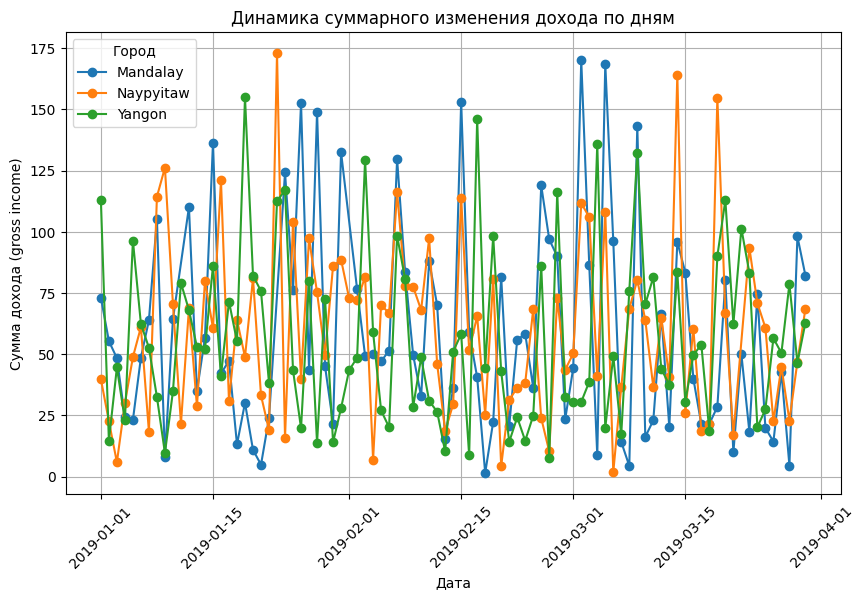

In [218]:
plt.figure(figsize=(10, 6))
for city in df_grouped['City'].unique():
    city_data = df_grouped[df_grouped['City'] == city]
    plt.plot(city_data['Date'], city_data['gross income'], marker='o', label=city)

plt.title('Динамика суммарного изменения дохода по дням')
plt.xlabel('Дата')
plt.ylabel('Сумма дохода (gross income)')
plt.legend(title='Город')
plt.grid(True)
plt.xticks(rotation=45)
plt.show()

In [219]:
# Добавление колонки недели в данные
df['Week'] = df['Date'].dt.isocalendar().week

# Группировка данных по городам и неделям
df_weekly = df.groupby(['City', 'Week']).agg({'gross income': 'sum'}).reset_index()

# Нахождение города с максимальной недельной прибылью
max_profit_row = df_weekly[df_weekly['gross income'] == df_weekly['gross income'].max()]

max_profit_row


,City,Week,gross income
8,Mandalay,9,630.285


In [220]:
df.groupby('Product line').agg({'Quantity': 'sum'}).sort_values('Quantity', ascending=False)

,Quantity
Product line,
Electronic accessories,971
Food and beverages,952
Sports and travel,920
Home and lifestyle,911
Fashion accessories,902
Health and beauty,854


In [221]:
customer_counts = df['Customer type'].value_counts(normalize=True)
normalized_shares = customer_counts.round(3)

normalized_shares

Customer type
Member    0.501
Normal    0.499
Name: proportion, dtype: float64

In [222]:
df.groupby('Payment').agg({'Total': 'mean'}).round(2)

,Total
Payment,
Cash,326.18
Credit card,324.01
Ewallet,318.82


In [223]:
weekly_avg_check = df.groupby(['Payment', 'Week']).agg({'Total': 'mean'}).reset_index()

week_3_data = weekly_avg_check[weekly_avg_check['Week'] == 3]

lowest_avg_payment_method = week_3_data[week_3_data['Total'] == week_3_data['Total'].min()]['Payment'].iloc[0]

lowest_avg_payment_method


'Ewallet'

In [224]:
week_3_data

,Payment,Week,Total
2,Cash,3,439.59125
15,Credit card,3,345.60900
28,Ewallet,3,282.20395


In [225]:
df = pd.read_csv('Electric_Car.csv')

In [226]:
df.head()

,Brand,Model,AccelSec,TopSpeed_KmH,Range_Km,Efficiency_WhKm,FastCharge_KmH,RapidCharge,PowerTrain,PlugType,BodyStyle,Segment,Seats,PriceEuro
0,Tesla,Model 3 Long Range Dual Motor,4.6,233,450,161,940,Yes,AWD,Type 2 CCS,Sedan,D,5,55480
1,Volkswagen,ID.3 Pure,10.0,160,270,167,250,Yes,RWD,Type 2 CCS,Hatchback,C,5,30000
2,Polestar,2,4.7,210,400,181,620,Yes,AWD,Type 2 CCS,Liftback,D,5,56440
3,BMW,iX3,6.8,180,360,206,560,Yes,RWD,Type 2 CCS,SUV,D,5,68040
4,Honda,e,9.5,145,170,168,190,Yes,RWD,Type 2 CCS,Hatchback,B,4,32997


In [227]:
df.columns

Index(['Brand', 'Model', 'AccelSec', 'TopSpeed_KmH', 'Range_Km',
       'Efficiency_WhKm', 'FastCharge_KmH', 'RapidCharge', 'PowerTrain',
       'PlugType', 'BodyStyle', 'Segment', 'Seats', 'PriceEuro'],
      dtype='object')

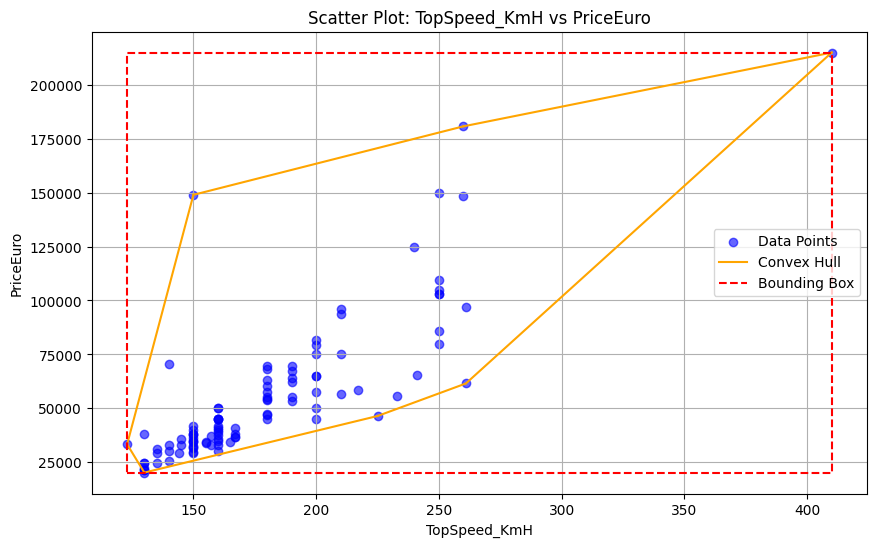

In [228]:
plt.figure(figsize=(10, 6))
plt.scatter(df['TopSpeed_KmH'], df['PriceEuro'], color='blue', alpha=0.6, label='Data Points')
plt.title('Scatter Plot: TopSpeed_KmH vs PriceEuro')
plt.xlabel('TopSpeed_KmH')
plt.ylabel('PriceEuro')
plt.grid(True)

# Вычисление и добавление описывающего многоугольника
points = df[['TopSpeed_KmH', 'PriceEuro']].dropna().values
hull = ConvexHull(points)

# Рисуем описывающий многоугольник
for simplex in hull.simplices:
    plt.plot(points[simplex, 0], points[simplex, 1], 'orange', label='Convex Hull' if simplex[0] == hull.simplices[0][0] else "")

# Вычисление описывающего прямоугольника
min_x, min_y = points[:, 0].min(), points[:, 1].min()
max_x, max_y = points[:, 0].max(), points[:, 1].max()
plt.plot([min_x, max_x, max_x, min_x, min_x], [min_y, min_y, max_y, max_y, min_y], 'r--', label='Bounding Box')

plt.legend()
plt.show()

In [229]:
# Количество вершин описывающего многоугольника
num_hull_vertices = len(hull.vertices)

# Площадь описывающего прямоугольника
bounding_box_area = (max_x - min_x) * (max_y - min_y)

num_hull_vertices, bounding_box_area

(7, np.int64(55927977))

In [230]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
df['BodyStyle_encoded'] = label_encoder.fit_transform(df['BodyStyle'])
sum = int(df['BodyStyle_encoded'].sum())


cat_count = df['BodyStyle_encoded'].nunique()


print(sum_encoded, cat_count)

420 9


In [231]:
type(sum), type(cat_count)

(int, int)

In [232]:
sum+cat_count

429